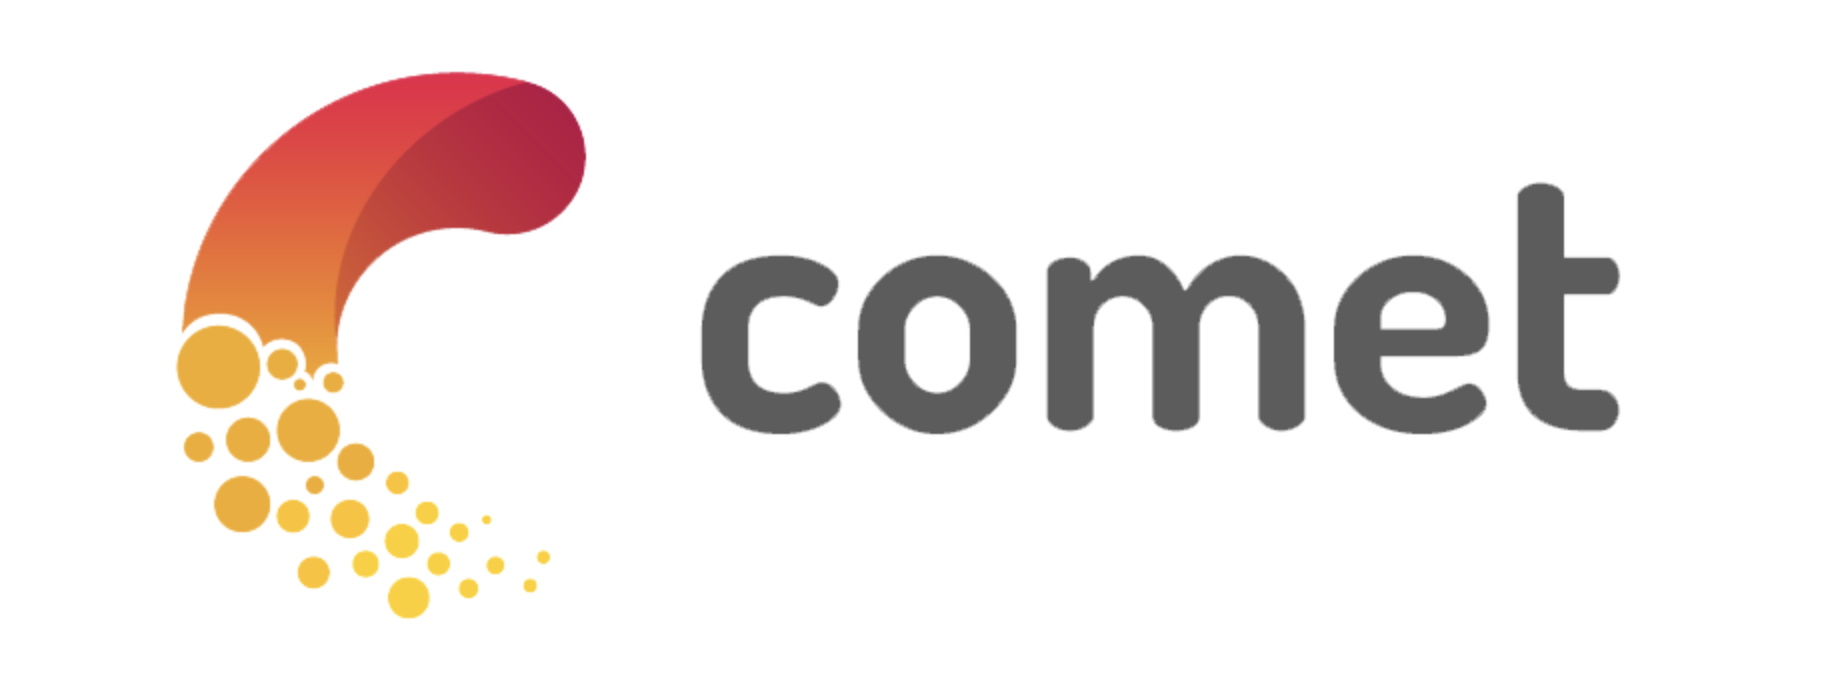

## Импорт библиотек

In [92]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from comet_ml import Experiment
import numpy as np
import plotly.express as px

In [93]:
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="CxsOxZCg1KhLYlfb0uEjHpKMW",
    project_name="sf-ds-practice",
    workspace="estaid",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/estaid/sf-ds-practice/4acaccba4c0f4dc09a3ed9ae83de803e



## Загрузка данных

In [94]:
df = pd.read_csv('data/KaggleV2-May-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


## Визуализация

### Распределение числовых признаков

{'web': 'https://www.comet.com/api/image/download?imageId=9f1ca646583348f1b282bc75dea7fa18&experimentKey=4acaccba4c0f4dc09a3ed9ae83de803e',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=9f1ca646583348f1b282bc75dea7fa18&experimentKey=4acaccba4c0f4dc09a3ed9ae83de803e',
 'imageId': '9f1ca646583348f1b282bc75dea7fa18'}

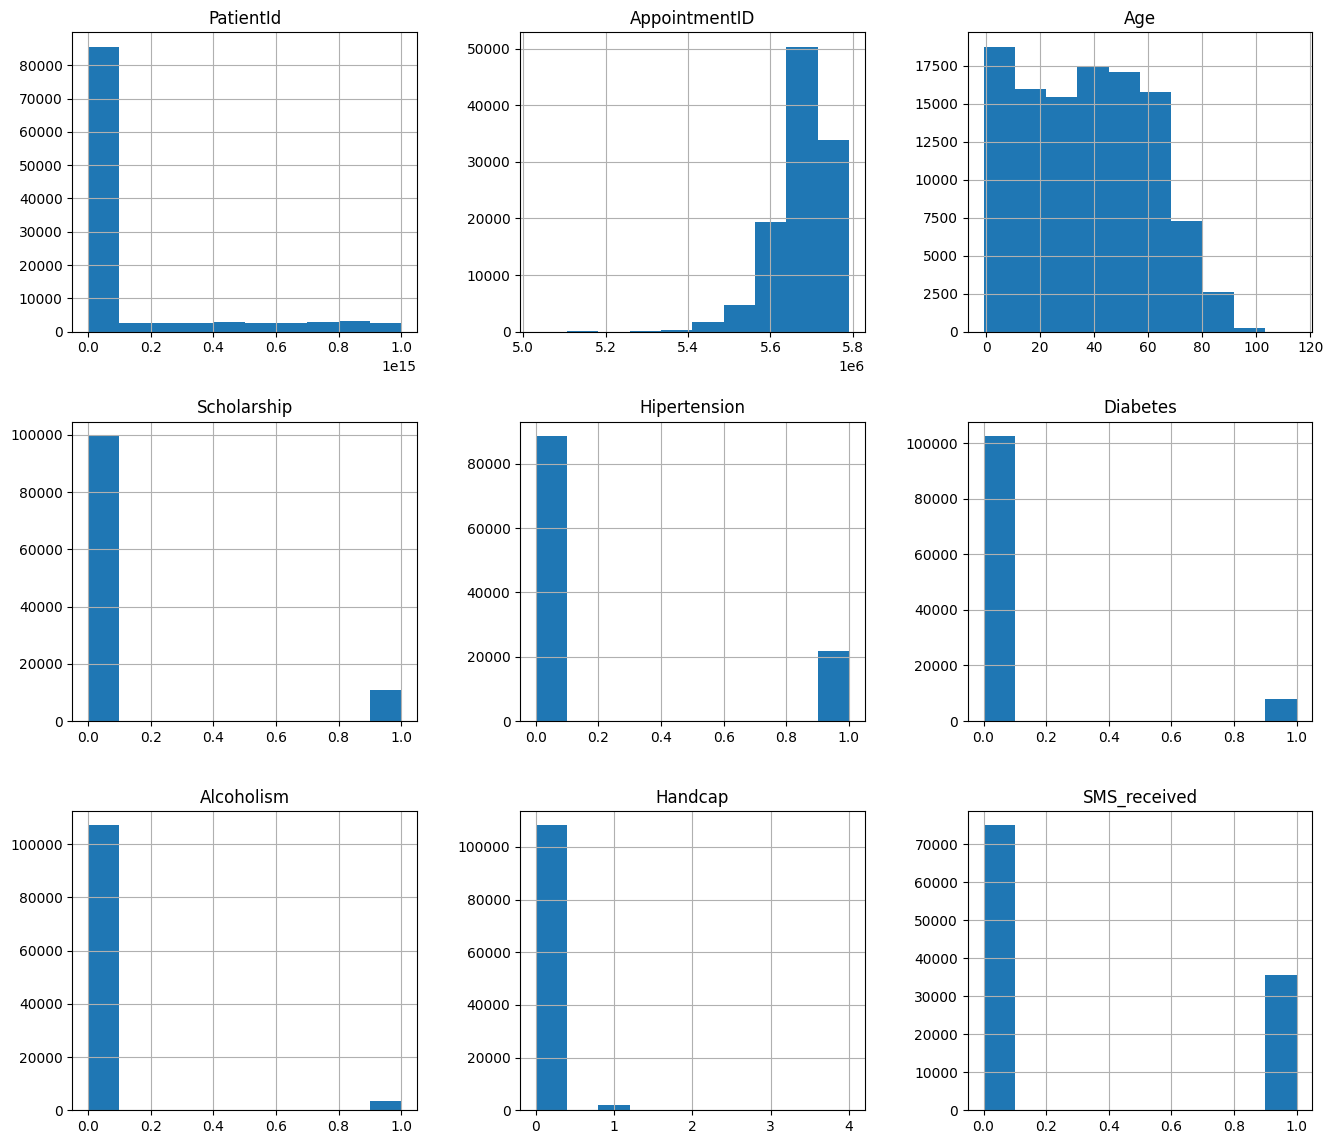

In [95]:
df.hist(figsize=(16,14))
#логируем гистограмму
experiment.log_figure(figure=plt)

#### Проанализируем число людей каждого возраста

In [96]:
print("Уникальные значения в `Age` => {}".format(df['Age'].unique()))

Уникальные значения в `Age` => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [97]:
# Удалим аномальные значения
df = df[(df['Age'] >= 0) & (df['Age'] <= 110)]
df['Age'].value_counts()

Age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: count, Length: 102, dtype: int64

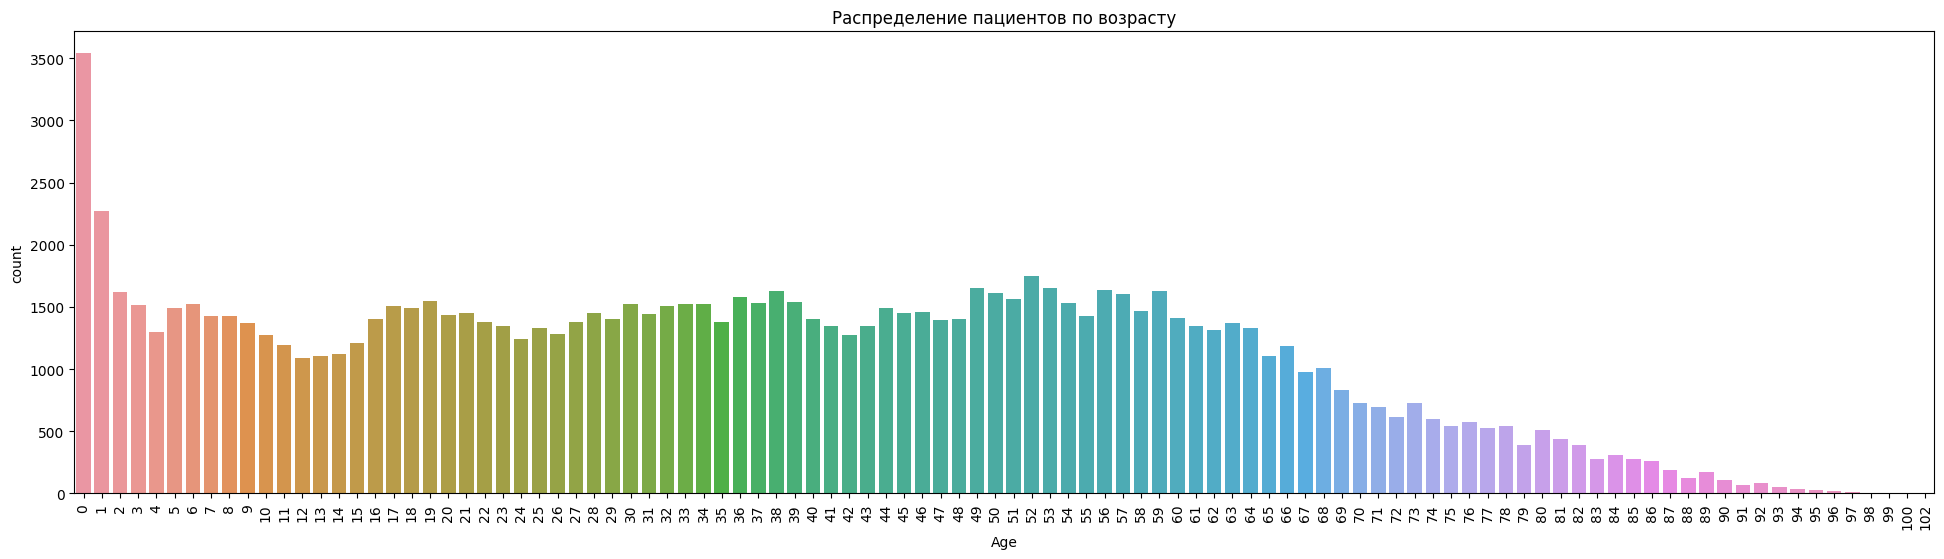

In [98]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df['Age'])
ax.set_title("Распределение пациентов по возрасту")
experiment.log_figure(figure=plt)
plt.show()

{'web': 'https://www.comet.com/api/image/download?imageId=b570bfc194d04c779cb1b77d8218fac0&experimentKey=4acaccba4c0f4dc09a3ed9ae83de803e',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=b570bfc194d04c779cb1b77d8218fac0&experimentKey=4acaccba4c0f4dc09a3ed9ae83de803e',
 'imageId': 'b570bfc194d04c779cb1b77d8218fac0'}

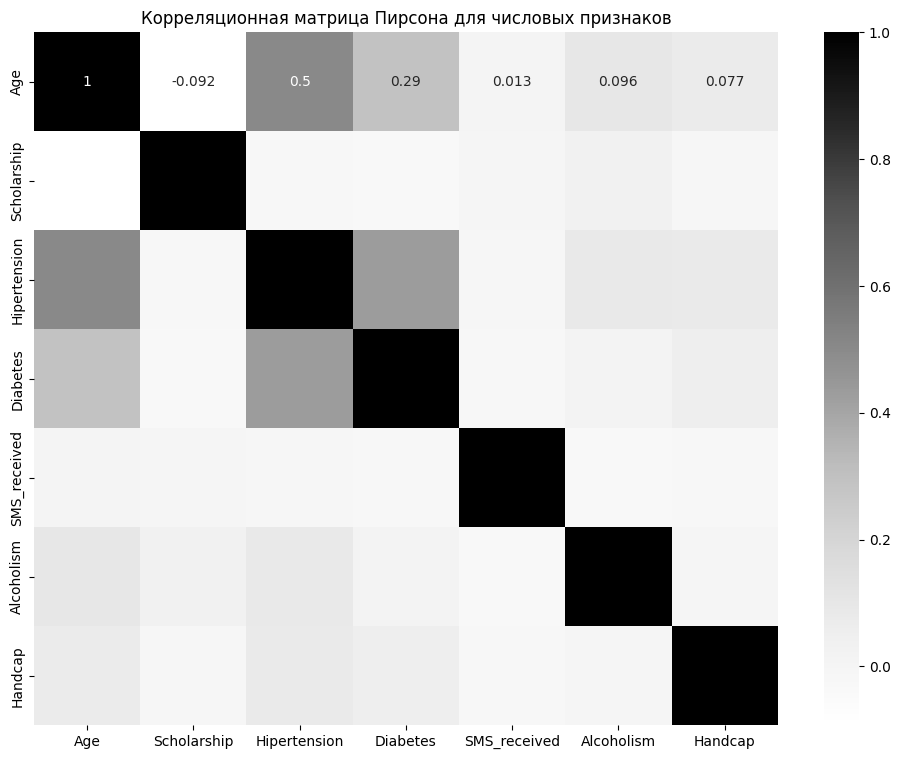

In [99]:
plt.figure(figsize=(12, 9))
columns_without_ids = list(set(df.columns) - set(['AppointmentID', 'PatientId']))
pearson_matrix = df[columns_without_ids].corr(numeric_only=True)
ax = sns.heatmap(pearson_matrix, cmap='Greys', annot=True)
ax.set_title('Корреляционная матрица Пирсона для числовых признаков')
experiment.log_figure(ax.figure)

## Придет ли пациент на назначенный прием?

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


## Кодировка категориальных признаков

In [101]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns=categorical_columns_names)
encoded_columns.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show'], axis=1, inplace=True)
encoded_columns.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,Neighbourhood_AEROPORTO,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,62,0,1,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,56,0,0,0,0,0,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,62,0,0,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8,0,0,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56,0,1,1,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
y = df['No-show']
y

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110521, dtype: object

In [103]:
y = y.replace({'No': 0, 'Yes': 1})
y.value_counts(True)

No-show
0    0.798084
1    0.201916
Name: proportion, dtype: float64

## Шкалирование данных

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_columns)
print(X.shape)

(110521, 90)


## Модель (этот раздел будет подробно изучен далее в курсе)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Инициализация модели

In [106]:
logreg = LogisticRegression()
random_state = 42

### Обучение модели

In [107]:
logreg.fit(X, y)

/Users/sayonara/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Логирование параметров обучения

In [108]:
params={"random_state": random_state,
        "model_type": "logreg"}
experiment.log_parameters(params)

### Предсказания модели

In [109]:
y_pred = logreg.predict(X)

### Анализ модели

In [110]:
accuracy = accuracy_score(y, y_pred)
print("Доля правильных ответов: {:6.3f}".format(accuracy))

Доля правильных ответов:  0.798


## Логирование метрик

In [111]:
metrics = {"accuracy": accuracy}
experiment.log_metrics(metrics)

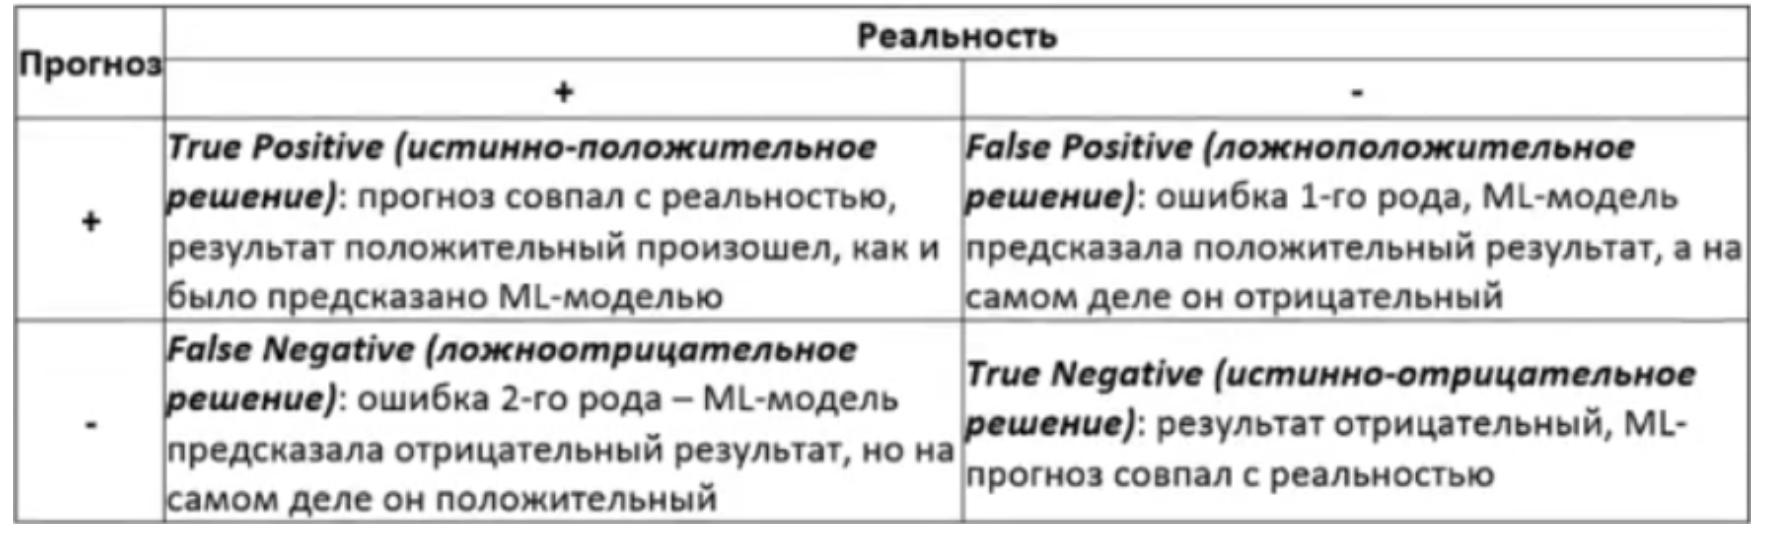

In [112]:
experiment.log_confusion_matrix(y.tolist(), y_pred.tolist())

{'web': 'https://www.comet.com/api/asset/download?assetId=e8f8eeaea6e24d4bb63f8fa74f25f758&experimentKey=4acaccba4c0f4dc09a3ed9ae83de803e',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=e8f8eeaea6e24d4bb63f8fa74f25f758&experimentKey=4acaccba4c0f4dc09a3ed9ae83de803e',
 'assetId': 'e8f8eeaea6e24d4bb63f8fa74f25f758'}

In [113]:
experiment.display()

In [114]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/estaid/sf-ds-practice/4acaccba4c0f4dc09a3ed9ae83de803e
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.7980836221170637
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : None
COMET INFO:     clip              : False
COMET INFO:     copy              : True
COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : None
COMET INFO:     max_iter          : 100
COMET INFO:     model_type        : logreg
COMET INFO:     multi_class       